In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
import pandas as pd

In [2]:
# Load the dataset
try:
    # The palmerpenguins package provides a clean version. We load it from its source.
    url = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
    df = pd.read_csv(url)
    print("Palmer Penguins dataset loaded successfully.")
except Exception as e:
    print(f"Failed to load dataset: {e}")
    df = pd.DataFrame() # Create empty dataframe to avoid further errors

Palmer Penguins dataset loaded successfully.


In [3]:
if not df.empty:
    print("\nOriginal Dataset Info:")
    df.info()

    # Handle missing values by dropping them (there are only a few)
    df_cleaned = df.dropna()
    print(f"\nDataset shape after dropping NA: {df_cleaned.shape}")

    # For clustering, we will use the numerical features
    numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
    X = df_cleaned[numerical_features]

    # Keep the true species labels for later evaluation
    y_true = df_cleaned['species']

    print("\nSelected features for clustering:")
    print(X.head())


Original Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB

Dataset shape after dropping NA: (333, 8)

Selected features for clustering:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0            39.1           18.7              181.0       3750.0
1            39.5           17.4              186.0       3800.0
2            40.3           18.0              195.0     

In [4]:
if not df.empty:
    print("\nOriginal Dataset Info:")
    df.info()

    # Handle missing values by dropping them (there are only a few)
    df_cleaned = df.dropna()
    print(f"\nDataset shape after dropping NA: {df_cleaned.shape}")

    # For clustering, we will use the numerical features
    numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
    X = df_cleaned[numerical_features]

    # Keep the true species labels for later evaluation
    y_true = df_cleaned['species']

    print("\nSelected features for clustering:")
    print(X.head())


Original Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB

Dataset shape after dropping NA: (333, 8)

Selected features for clustering:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0            39.1           18.7              181.0       3750.0
1            39.5           17.4              186.0       3800.0
2            40.3           18.0              195.0     

In [5]:
if 'X' in locals():
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    print("\nData has been scaled using StandardScaler.")
    print("First 5 rows of scaled data:")
    print(pd.DataFrame(X_scaled, columns=numerical_features).head())


Data has been scaled using StandardScaler.
First 5 rows of scaled data:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       -0.896042       0.780732          -1.426752    -0.568475
1       -0.822788       0.119584          -1.069474    -0.506286
2       -0.676280       0.424729          -0.426373    -1.190361
3       -1.335566       1.085877          -0.569284    -0.941606
4       -0.859415       1.747026          -0.783651    -0.692852


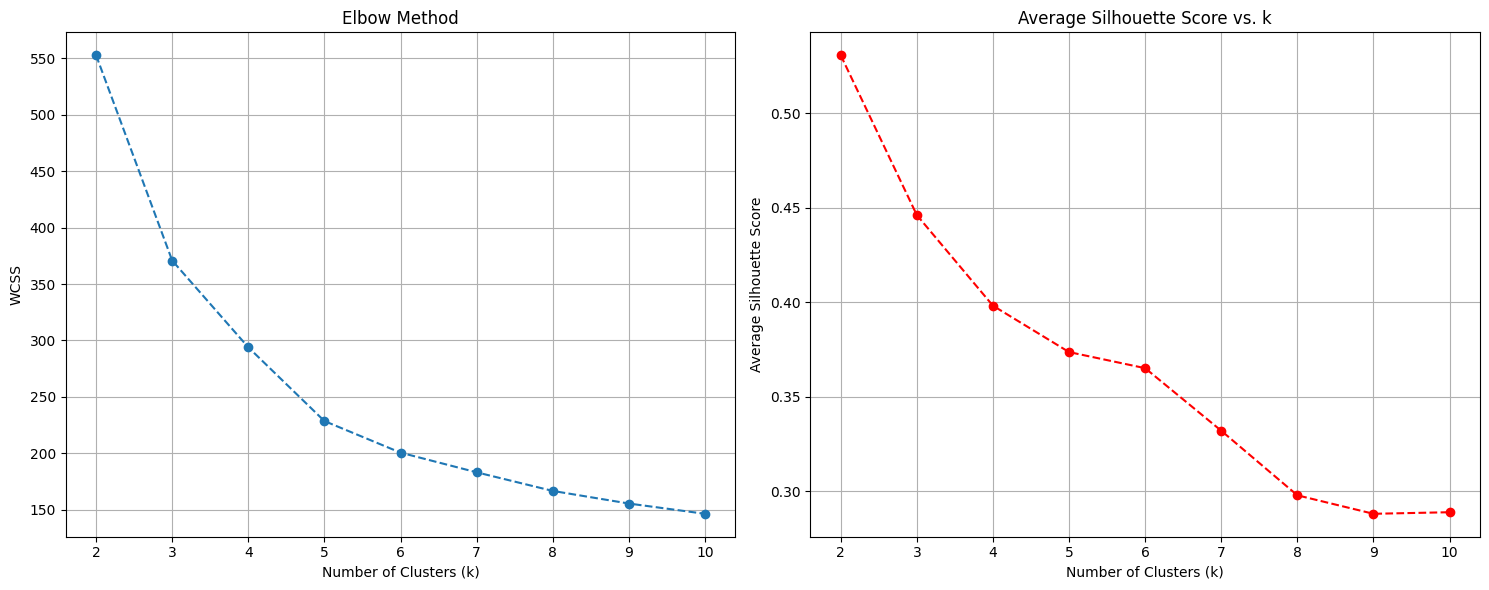

In [6]:
if 'X_scaled' in locals():
    wcss = []
    silhouette_scores = []
    k_range = range(2, 11) # Start from 2 for silhouette score

    for k in k_range:
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

    # Plotting
    plt.figure(figsize=(15, 6))

    # Elbow Method Plot
    plt.subplot(1, 2, 1)
    plt.plot(k_range, wcss, marker='o', linestyle='--')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.grid(True)

    # Average Silhouette Score Plot
    plt.subplot(1, 2, 2)
    plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', color='r')
    plt.title('Average Silhouette Score vs. k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Average Silhouette Score')
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    # The silhouette score plot peaks at k=2, but k=3 (the actual number of species)
    # also has a high score and a good elbow. Let's explore these visually.

For n_clusters = 2, the average silhouette_score is : 0.5308
For n_clusters = 3, the average silhouette_score is : 0.4462
For n_clusters = 4, the average silhouette_score is : 0.3982


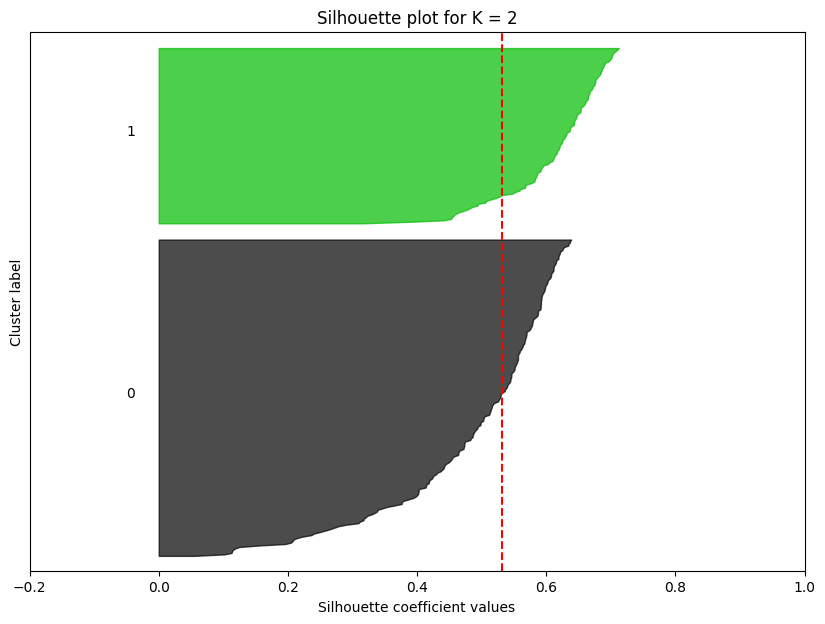

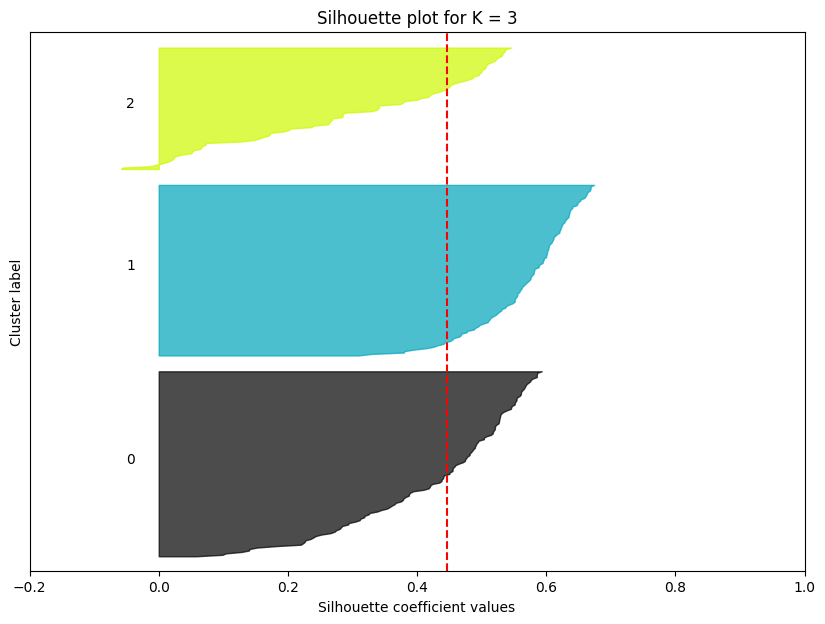

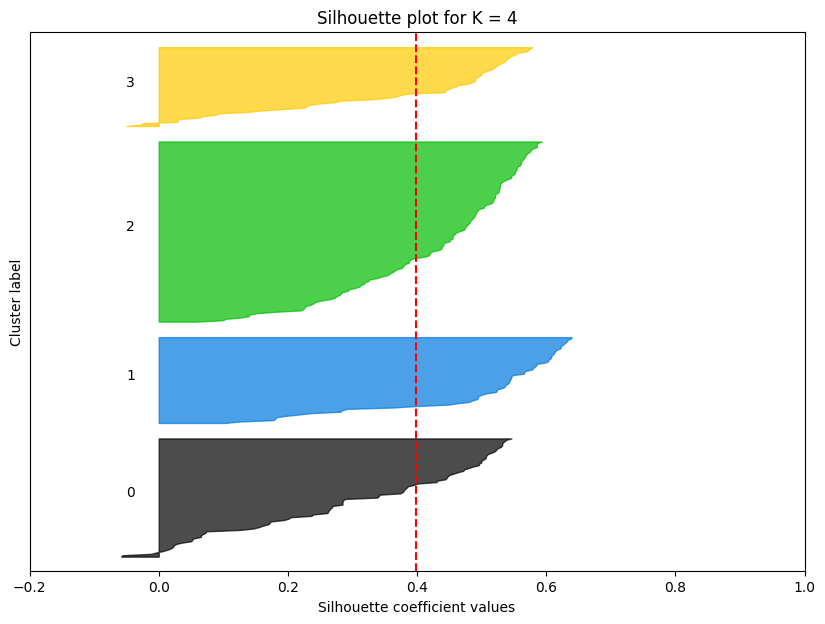


Based on the analysis, the optimal number of clusters is 3.


In [7]:
if 'X_scaled' in locals():
    for k in [2, 3, 4]:
        # Create a subplot with 1 row and 1 column
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(10, 7)

        # The 1st subplot is the silhouette plot
        ax1.set_xlim([-0.2, 1])
        # The (k+1)*10 is for inserting blank space between silhouette plots of individual clusters
        ax1.set_ylim([0, len(X_scaled) + (k + 1) * 10])

        # Initialize the clusterer with k value
        clusterer = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
        cluster_labels = clusterer.fit_predict(X_scaled)

        # The silhouette_score gives the average value for all the samples.
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        print(f"For n_clusters = {k}, the average silhouette_score is : {silhouette_avg:.4f}")

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

        y_lower = 10
        for i in range(k):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / k)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title(f"Silhouette plot for K = {k}")
        ax1.set_xlabel("Silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The average silhouette score
        ax1.set_yticks([])
        ax1.set_xticks(np.arange(-0.2, 1.1, 0.2))

    plt.show()
    # Observation: The plot for K=3 shows clusters of more uniform thickness and positive scores,
    # suggesting it's a better fit than K=2 or K=4. We will choose k=3.
    print("\nBased on the analysis, the optimal number of clusters is 3.")

In [9]:
if 'X_scaled' in locals():
    optimal_k = 3
    kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
    y_kmeans = kmeans.fit_predict(X_scaled)

    # Add cluster info to the cleaned dataframe
    df_cleaned['cluster'] = y_kmeans

    # Reduce dimensionality with PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
    df_pca['cluster'] = y_kmeans
    df_pca['species'] = y_true.values

    print(f"\nFinal K-Means model trained with k={optimal_k}.")
    print(f"Data reduced to 2 Principal Components. Explained variance ratio: {pca.explained_variance_ratio_}")




Final K-Means model trained with k=3.
Data reduced to 2 Principal Components. Explained variance ratio: [0.68633893 0.19452929]


/var/folders/yl/5z_0b2k971j0fv_1mypdpx180000gn/T/ipykernel_44216/791184430.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cluster'] = y_kmeans


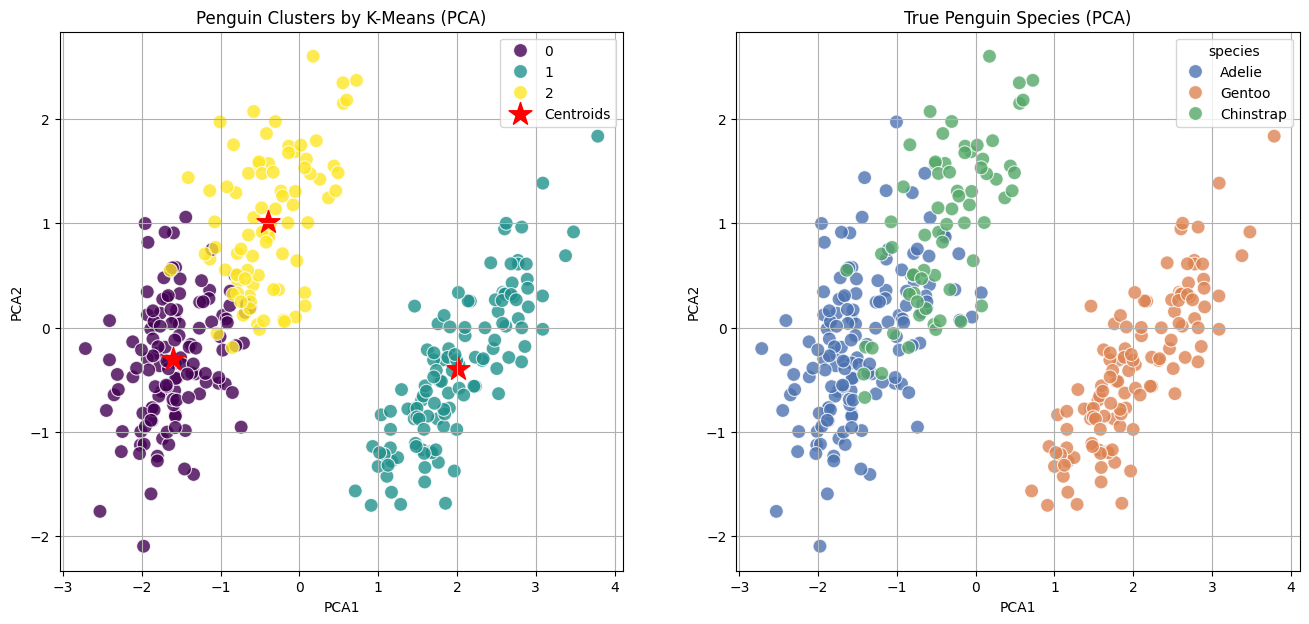

In [10]:
if 'df_pca' in locals():
    plt.figure(figsize=(16, 7))

    # Plot 1: Colored by K-Means Cluster
    plt.subplot(1, 2, 1)
    sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df_pca, palette='viridis', s=100, alpha=0.8)
    # Plot centroids
    centroids_pca = pca.transform(kmeans.cluster_centers_)
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', marker='*', label='Centroids')
    plt.title('Penguin Clusters by K-Means (PCA)')
    plt.legend()
    plt.grid(True)

    # Plot 2: Colored by True Species
    plt.subplot(1, 2, 2)
    sns.scatterplot(x='PCA1', y='PCA2', hue='species', data=df_pca, palette='deep', s=100, alpha=0.8)
    plt.title('True Penguin Species (PCA)')
    plt.grid(True)

    plt.show()
